# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


In [3]:
Target = 'CHURN'

|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : 초과 사용시간이 많으면 옮길 가능성이 높을 것이다.

* 가설2 : 만족도가 낮다면 옮길 가능성이 높을 것이다.

* 가설3 : 변경 계획 설문에 응했다면 옮길 것이다.

* 가설4 : 평균 통화시간이 길면서 잔여시간이 낮다면 옮길 가능성이 높을 것이다.

* 가설5 : 평균 통화시간이 길면서 초과시간이 많다면 옮길 가능성이 높을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1

OVERAGE(월 초과 사용 시간)

① 변수의 비즈니스 의미

월 초과 사용 시간

② 숫자, 범주?

숫자

③ NaN 존재 유무

In [4]:
mobile.isna().sum()

COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURN                            0
dtype: int64

집, 만족도 조사에 널값 존재.

## 널 값 제거

In [5]:
mobile.dropna(axis=0,inplace=True)
mobile.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

④ 기초통계량(수치화)

In [6]:
mobile['OVERAGE'].describe()

count    17747.000000
mean        86.032794
std         85.958571
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포 확인(시각화)

<AxesSubplot:xlabel='OVERAGE', ylabel='Count'>

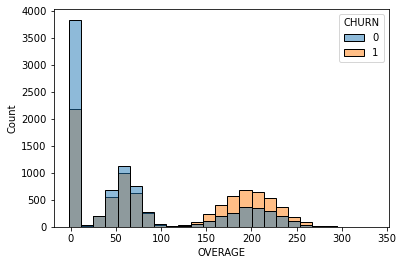

In [7]:
sns.histplot(x='OVERAGE',hue = Target,data=mobile)

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

초과시간이 150분을 넘긴 시점부터 이탈율이 눈에 띄게 늘어남.

⑦ 추가 분석해 볼 사항이 있나요?

<AxesSubplot:xlabel='OVERAGE', ylabel='Count'>

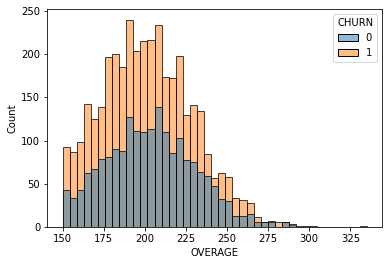

In [8]:
tmp = mobile.loc[mobile['OVERAGE']>=150]
sns.histplot(x='OVERAGE',hue=Target,data=tmp)
# 150분 이상 이탈율

### 2) feature2

In [9]:
mobile['SAT'] = mobile['REPORTED_SATISFACTION']

In [10]:
mobile[Target].mean()

0.49309742491688735

① 변수의 비즈니스 의미

만족도 설문

② 숫자, 범주?

범주

③ NaN 존재 유무

* 1에서 모든 결측치 제거를 했으므로 패스

④ 기초통계량(수치화)

In [11]:
mobile['SAT'].value_counts()

very_unsat    6997
very_sat      4508
unsat         3548
avg           1774
sat            920
Name: SAT, dtype: int64

⑤ 분포 확인(시각화)

<AxesSubplot:xlabel='REPORTED_SATISFACTION', ylabel='CHURN'>

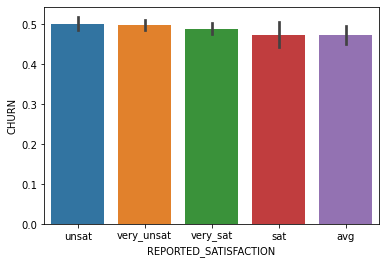

In [12]:
sns.barplot(x='REPORTED_SATISFACTION',y=Target,data=mobile)

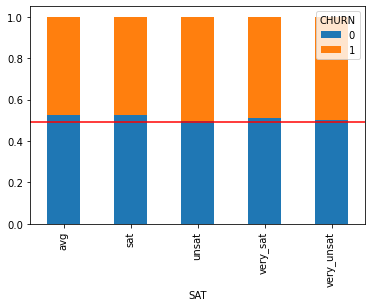

In [13]:
tmp = pd.crosstab(mobile['SAT'],mobile[Target],normalize='index')
tmp.plot.bar(stacked=True)
plt.axhline(mobile[Target].mean(), color = 'r')

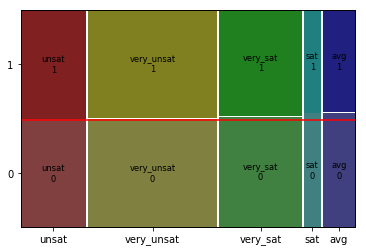

In [14]:
mosaic(mobile,['SAT',Target])
plt.axhline(mobile[Target].mean(), color = 'r')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

만족도와 이탈에는 연관성이 없었다.

⑦ 추가 분석해 볼 사항이 있나요?

관계없음.

### 3) feature3

In [15]:
plan = 'CONSIDERING_CHANGE_OF_PLAN'

① 변수의 비즈니스 의미

변경 설문에 응할 경우 어떠했는가

② 숫자, 범주?

범주

③ NaN 존재 유무

* 1번에서 전체 삭제했기에 없음.

④ 기초통계량(수치화)

In [16]:
mobile[plan].value_counts()

considering                 7028
actively_looking_into_it    4391
no                          3599
never_thought               1783
perhaps                      946
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

⑤ 분포 확인(시각화)

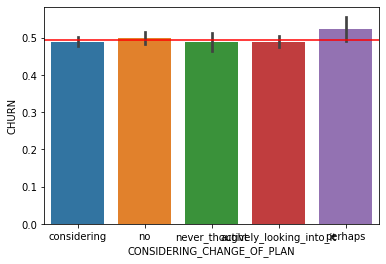

In [17]:
sns.barplot(x=plan,y=Target,data=mobile)
plt.axhline(mobile[Target].mean(), color = 'r')

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

설문조사와 이탈엔 큰 연관성은 없어보임.

⑦ 추가 분석해 볼 사항이 있나요?

관계없음.

### 4) feature4

평균 통화시간이 길면 옮길 가능성이 높을 것이다.

In [18]:
avg = 'AVERAGE_CALL_DURATION'
tov = 'LEFTOVER'

① 변수의 비즈니스 의미

통화시간(분)

② 숫자, 범주?

숫자

③ NaN 존재 유무

없음.

④ 기초통계량(수치화)

In [19]:
mobile[avg].describe()

count    17747.000000
mean         5.991548
std          4.400693
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

⑤ 분포 확인(시각화)

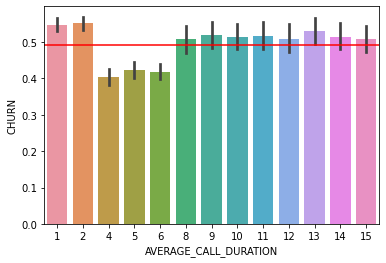

In [20]:
sns.barplot(x=avg,y=Target,data=mobile)
plt.axhline(mobile[Target].mean(),color='r')

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

평균 통화시간이 4~6분 사이의 고객이 이탈율이 낮은점 빼고는 특정한 패턴은 보이지 않음.

⑦ 추가 분석해 볼 사항이 있나요?

### 5) feature5

잔여시간이 적다면 이탈율이 높을 것이다.

① 변수의 비즈니스 의미

요금제 잔여시간의 양

② 숫자, 범주?

숫자

③ NaN 존재 유무

없음

④ 기초통계량(수치화)

In [21]:
mobile[tov].describe()

count    17747.000000
mean        23.992393
std         26.866157
min          0.000000
25%          0.000000
50%         14.000000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

<AxesSubplot:xlabel='LEFTOVER', ylabel='Count'>

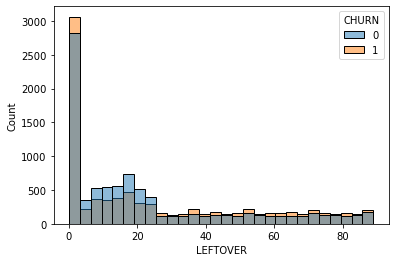

In [22]:
sns.histplot(hue=Target,x=tov,data=mobile)

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

0분대와 30분대 이후에 이탈율이 근소하게 높은데  

각각 시간이 부족해 시간을 늘리기위한 이탈,  

시간이 남아서 요금제를 줄이기 위한 이탈로 해석이 가능해보임.

⑦ 추가 분석해 볼 사항이 있나요?

### 6) target

① 변수의 비즈니스 의미

이탈여부

② 숫자, 범주?

범주

③ NaN 존재 유무

없음

④ 기초통계량(수치화)

In [23]:
mobile[Target].value_counts()

0    8996
1    8751
Name: CHURN, dtype: int64

⑤ 분포 확인(시각화)

<AxesSubplot:xlabel='CHURN', ylabel='HANDSET_PRICE'>

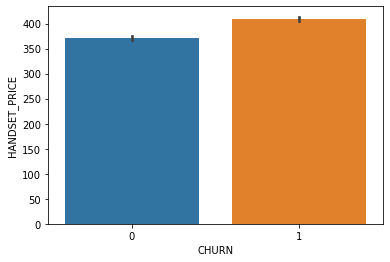

In [24]:
sns.barplot(x=Target,y='HANDSET_PRICE',data=mobile)

<AxesSubplot:xlabel='HANDSET_PRICE', ylabel='Count'>

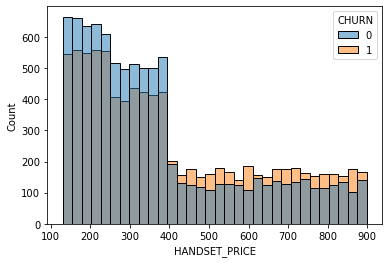

In [25]:
sns.histplot(x='HANDSET_PRICE',hue=Target,data=mobile)

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

400달러 기점으로 휴대폰 가격이 높을수록 이탈율이 생깁니다.

⑦ 추가 분석해 볼 사항이 있나요?

In [26]:
tmp = mobile.loc[mobile['HANDSET_PRICE']>400]
tmp[Target].mean()

0.5645750332005313

<AxesSubplot:xlabel='HANDSET_PRICE', ylabel='Count'>

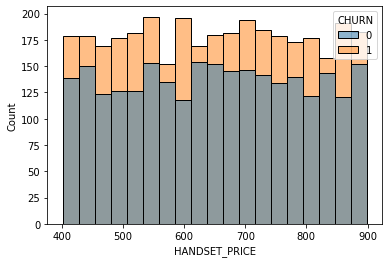

In [27]:
sns.histplot(x='HANDSET_PRICE',hue=Target,data=tmp)

휴대폰 가격이400달러를 넘긴 시점에 49%였던 이탈률이 7%상승함.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [28]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [29]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49309742491688735


#### 1) feature --> CHURN

In [30]:
SAT = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [31]:
tmp = pd.crosstab(mobile[SAT],mobile[Target],normalize='columns')
tmp

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.103935,0.095875
sat,0.053802,0.049823
unsat,0.196643,0.203291
very_sat,0.256003,0.251971
very_unsat,0.389618,0.399040


② 시각화( Stacked Bar, Mosaic)

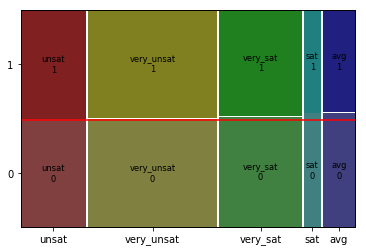

In [32]:
mosaic(mobile,[SAT,Target])
plt.axhline(mobile[Target].mean(),color='r')
plt.show()

<AxesSubplot:xlabel='REPORTED_SATISFACTION'>

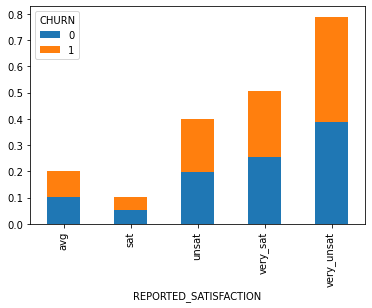

In [33]:
tmp.plot.bar(stacked=True)

시각화를 통해 파악한 내용을 적어 봅시다.

불만족보다 만족, 보통이 이탈율이 더 높은걸 보아 관계가 없어보임.

③ 가설검정(카이제곱검정)

In [34]:
result=spst.chi2_contingency(tmp)
print(result[0])
print(result[1])
print(result[3])

0.000733007486667054
0.999999932853911
[[0.09990492 0.09990492]
 [0.05181228 0.05181228]
 [0.199967   0.199967  ]
 [0.25398694 0.25398694]
 [0.39432886 0.39432886]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

관계없음.

#### 2) feature --> CHURN

In [35]:
OVG = 'OVERAGE'

① 교차표(pd.crosstab())

In [36]:
tmp = pd.crosstab(mobile[plan],mobile[Target],normalize='columns')
tmp

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,0.249444,0.245343
considering,0.399066,0.392869
never_thought,0.101378,0.099531
no,0.199978,0.205691
perhaps,0.050133,0.056565


② 시각화( Stacked Bar, Mosaic)

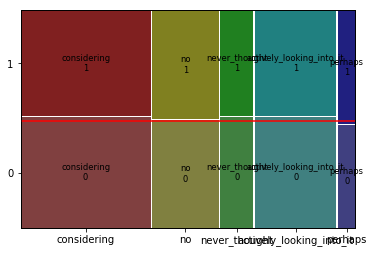

In [37]:
mosaic(mobile,[plan,Target])
plt.axhline(mobile[Target].mean(),color='r')
plt.show()

<AxesSubplot:xlabel='CONSIDERING_CHANGE_OF_PLAN'>

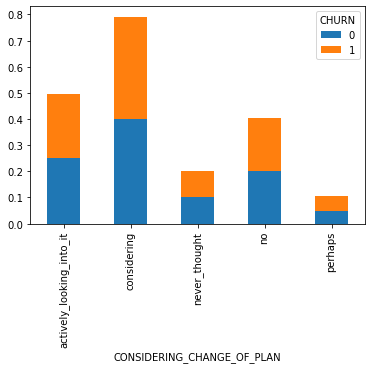

In [38]:
tmp.plot.bar(stacked=True)

시각화를 통해 파악한 내용을 적어 봅시다.

만족도와 같이 별로 관계가 없어보임.

③ 가설검정(카이제곱검정)

In [39]:
result=spst.chi2_contingency(tmp)
print(result[0])
print(result[1])
print(result[3])

0.0005675946855235261
0.9999999597371524
[[0.24739379 0.24739379]
 [0.39596782 0.39596782]
 [0.10045494 0.10045494]
 [0.20283427 0.20283427]
 [0.05334918 0.05334918]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

만족도보다 더 관계없음

#### 3) feature --> CHURN

In [40]:
lev = 'REPORTED_USAGE_LEVEL'

① 교차표(pd.crosstab())

In [41]:
tmp = pd.crosstab(mobile[lev],mobile[Target])

② 시각화( Stacked Bar, Mosaic)

<AxesSubplot:xlabel='REPORTED_USAGE_LEVEL'>

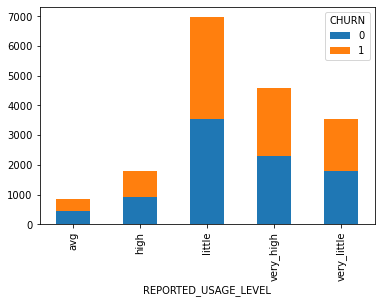

In [42]:
tmp.plot.bar(stacked=True)

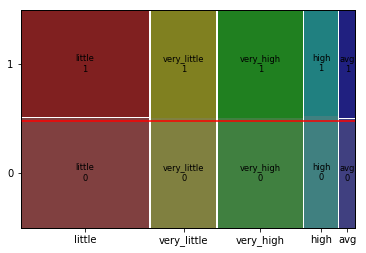

In [43]:
mosaic(mobile,[lev,Target])
plt.axhline(mobile[Target].mean(),color='r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

관계가 없어보임.

③ 가설검정(카이제곱검정)

In [44]:
result=spst.chi2_contingency(tmp)
print(result[0])
print(result[1])
print(result[3])

0.5743612907298135
0.9658696758379451
[[ 440.49833775  428.50166225]
 [ 908.87631712  884.12368288]
 [3530.57643545 3434.42356455]
 [2323.13450161 2259.86549839]
 [1792.91440807 1744.08559193]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

관계없음.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) feature --> CHURN


In [45]:
ovg = 'OVERAGE'

① 그래프 : histogram, densityplot

<AxesSubplot:xlabel='OVERAGE', ylabel='Count'>

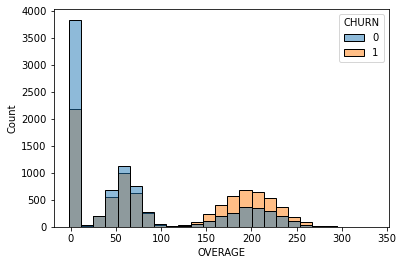

In [46]:
sns.histplot(x=ovg,hue=Target,data=mobile)

<AxesSubplot:xlabel='OVERAGE', ylabel='Density'>

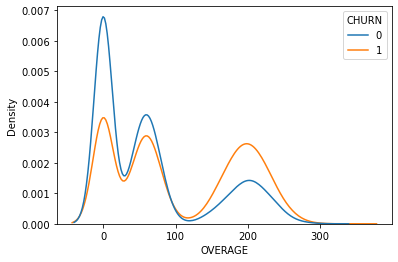

In [47]:
sns.kdeplot(data=mobile,x=ovg,hue=Target,common_norm=True)

시각화를 통해 파악한 내용을 적어 봅시다.

초과사용시간이 200분 근처의 고객은 이탈할 가능성이 높게 나옴.

<AxesSubplot:xlabel='OVERAGE', ylabel='Count'>

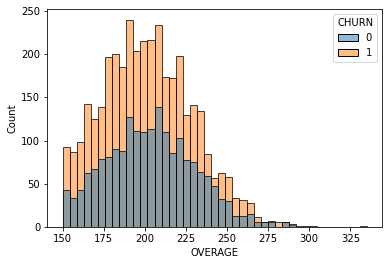

In [48]:
tmp = mobile.loc[mobile['OVERAGE']>=150]
sns.histplot(x='OVERAGE',hue=Target,data=tmp)
# 150분 이상 이탈율

② 수치화 : 로지스틱회귀

In [49]:
model = sm.Logit(mobile[Target], mobile[ovg])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680632
         Iterations 4
OVERAGE    2.805475e-95
dtype: float64


In [50]:
model = sm.Logit(tmp[Target], tmp[ovg])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.644722
         Iterations 4
OVERAGE    9.241128e-115
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p밸류는 귀무가설이 맞다고 말하지만  
150분 이상 고객 맞춤 프로모션을 제공한다면 이탈을 막을 수 있을 것으로 예상됨.

#### 2) feature --> CHURN


In [51]:
tov = 'LEFTOVER'

① 그래프 : histogram, densityplot

<AxesSubplot:xlabel='LEFTOVER', ylabel='Count'>

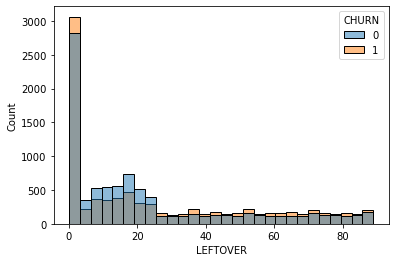

In [52]:
sns.histplot(hue=Target,x=tov,data=mobile)

<AxesSubplot:xlabel='LEFTOVER', ylabel='Density'>

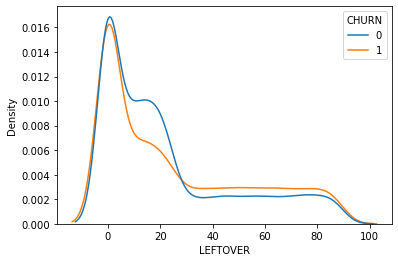

In [53]:
sns.kdeplot(data=mobile,x=tov,hue=Target,common_norm=True)

시각화를 통해 파악한 내용을 적어 봅시다.

잔여시간이 부족한쪽, 넉넉하게 남는쪽에서 이탈율이 발생했다.

In [54]:
tmp = mobile.loc[(mobile[tov]<5)|(mobile[tov]>=30)]

In [55]:
tmp

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN,SAT
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1,unsat
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0,very_unsat
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1,unsat
5,1,119591,0,43,231309.0,714,1,1,very_sat,little,considering,0,very_sat
6,1,99548,235,0,238561.0,294,15,6,very_unsat,little,actively_looking_into_it,1,very_unsat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,0,20681,60,34,680829.0,209,3,2,very_unsat,little,never_thought,0,very_unsat
17779,1,36951,55,70,596417.0,226,15,1,sat,high,considering,0,sat
17780,0,46760,230,0,552976.0,224,19,11,very_unsat,very_high,actively_looking_into_it,1,very_unsat
17781,1,50889,29,40,199087.0,332,4,2,very_unsat,very_little,actively_looking_into_it,1,very_unsat


<AxesSubplot:xlabel='LEFTOVER', ylabel='Count'>

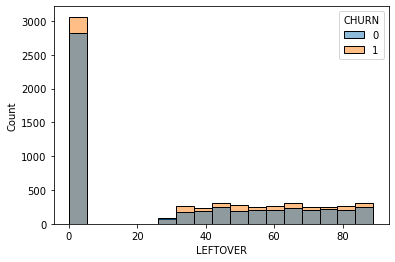

In [56]:
sns.histplot(x=tov,hue=Target,data=tmp)

② 수치화 : 로지스틱회귀

In [57]:
model = sm.Logit(mobile[Target], mobile[tov])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692518
         Iterations 3
LEFTOVER    0.000002
dtype: float64


In [58]:
model = sm.Logit(tmp[Target], tmp[tov])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.690098
         Iterations 3
LEFTOVER    1.139710e-16
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p밸류는 관련없다고 함. 그러나 패턴이 보였음.

#### 3) feature --> CHURN


In [59]:
price = 'HANDSET_PRICE'

① 그래프 : histogram, densityplot

<AxesSubplot:xlabel='HANDSET_PRICE', ylabel='Count'>

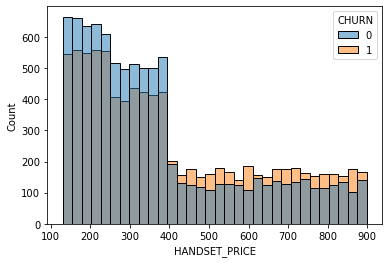

In [60]:
sns.histplot(hue=Target,x=price,data=mobile)

<AxesSubplot:xlabel='HANDSET_PRICE', ylabel='Density'>

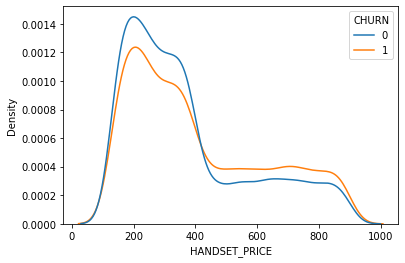

In [61]:
sns.kdeplot(data=mobile,x=price,hue=Target,common_norm=True)

시각화를 통해 파악한 내용을 적어 봅시다.

400달러를 기점으로 이탈율이 생김.

In [62]:
tmp = mobile.loc[(mobile[price]>=400)]

<AxesSubplot:xlabel='HANDSET_PRICE', ylabel='Count'>

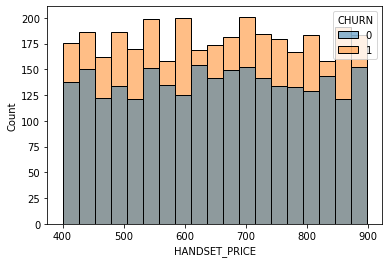

In [63]:
sns.histplot(x=price,hue=Target,data=tmp)

② 수치화 : 로지스틱회귀

In [64]:
model = sm.Logit(mobile[Target], mobile[price])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692695
         Iterations 3
HANDSET_PRICE    0.000063
dtype: float64


In [65]:
model = sm.Logit(tmp[Target], tmp[price])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685177
         Iterations 3
HANDSET_PRICE    1.635249e-22
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p밸류는 관련없다고 함.
그러나 패턴이 보였음.

## 4.관계 정리

### 1) 강한관계의 변수

INCOME, HANDSET_PRICE, OVERAGE

### 2) 약한관계의 변수

LEFTOVER, OVER_15MINS_CALLS_PER_MONTH

### 3) 관계 없음

REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN, COLLAGE

## 5.추가 분석

In [66]:
over = 'OVER_15MINS_CALLS_PER_MONTH'

In [67]:
inc = 'INCOME'

In [68]:
tmp = mobile.loc[(mobile[price]>=400)]

In [69]:
tmp = mobile.loc[(mobile[tov]<5)|(mobile[tov]>=30)]

In [70]:
tmp = mobile.loc[mobile['OVERAGE']>=150]

In [71]:
tmp = mobile.loc[mobile[Target]==1]

In [72]:
tmp = mobile.loc[mobile[inc]>=100000]

In [73]:
tmp

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN,SAT
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0,unsat
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0,very_unsat
5,1,119591,0,43,231309.0,714,1,1,very_sat,little,considering,0,very_sat
9,1,155145,29,18,717451.0,671,4,4,unsat,high,considering,0,unsat
10,0,117558,40,6,403254.0,263,3,6,very_unsat,very_high,considering,0,very_unsat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17768,1,155719,0,20,563384.0,746,0,6,avg,very_high,considering,0,avg
17770,1,110816,190,19,963506.0,515,13,4,very_unsat,very_high,actively_looking_into_it,1,very_unsat
17772,0,136911,194,23,567195.0,714,10,5,very_sat,very_little,actively_looking_into_it,0,very_sat
17778,1,104664,179,24,595246.0,854,25,5,very_sat,very_little,perhaps,0,very_sat


In [74]:
mobile = pd.read_csv(data_path)
mobile.drop(['id'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


<AxesSubplot:xlabel='INCOME', ylabel='HANDSET_PRICE'>

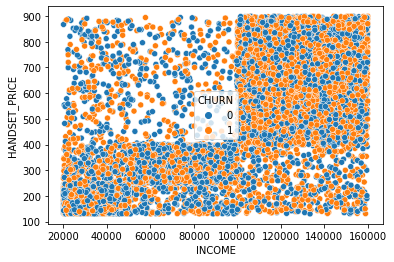

In [75]:
sns.scatterplot(x=inc,y=price,data=mobile,hue=Target)

In [76]:
tmp1 = mobile.loc[(mobile[inc]>=100000)&(mobile[price]>=400)]
# 1시방향

tmp2 = mobile.loc[(mobile[inc]>=100000)&(mobile[price]<400)]
# 5시방향

tmp3 = mobile.loc[(mobile[inc]<100000)&(mobile[price]>=400)]
# 7시방향

tmp4 = mobile.loc[(mobile[inc]<100000)&(mobile[price]<400)]
# 11시방향

In [77]:
mobile[Target].mean()

0.49272222222222223

<AxesSubplot:xlabel='INCOME', ylabel='HANDSET_PRICE'>

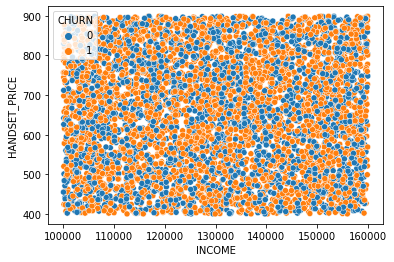

In [78]:
sns.scatterplot(x=inc,y=price,data=tmp1,hue=Target)

In [79]:
tmp1[Target].mean()

0.576476984414643

<AxesSubplot:xlabel='INCOME', ylabel='HANDSET_PRICE'>

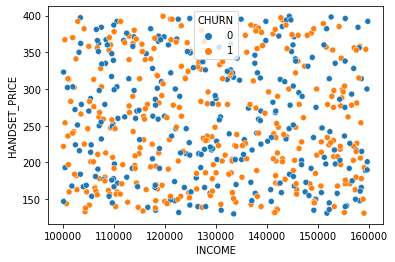

In [80]:
sns.scatterplot(x=inc,y=price,data=tmp2,hue=Target)

In [81]:
tmp2[Target].mean()

0.5509499136442142

<AxesSubplot:xlabel='INCOME', ylabel='HANDSET_PRICE'>

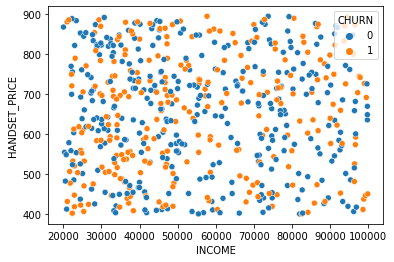

In [82]:
sns.scatterplot(x=inc,y=price,data=tmp3,hue=Target)

In [83]:
tmp3[Target].mean()

0.4470588235294118

<AxesSubplot:xlabel='INCOME', ylabel='HANDSET_PRICE'>

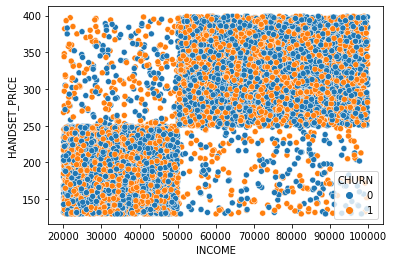

In [84]:
sns.scatterplot(x=inc,y=price,data=tmp4,hue=Target)

In [85]:
tmp4[Target].mean()

0.45127343473646975

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

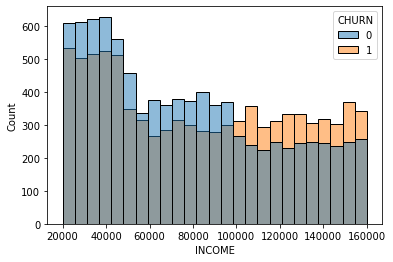

In [86]:
sns.histplot(x=inc,hue=Target,data=mobile)

In [87]:
tmp = mobile.loc[(mobile[inc]>=100000)&(mobile[ovg]>0)]

<AxesSubplot:xlabel='OVERAGE', ylabel='INCOME'>

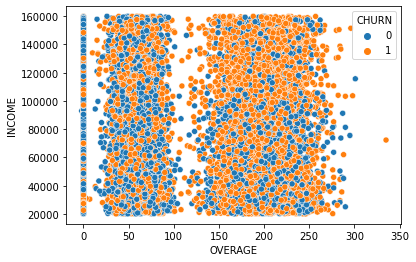

In [88]:
sns.scatterplot(x=ovg,y=inc,hue=Target,data=mobile)

In [89]:
tmp[Target].mean()

0.6682289097187962

In [90]:
spst.pearsonr(tmp[inc],tmp[ovg])

(0.009585209386855038, 0.5417783715539087)

초과 사용시간 100분 & 연 수입액 10만달러 이상의 경우 이탈의 확률이 매우 높다.

In [91]:
temp = mobile.loc[(mobile[inc]>=100000)&(mobile[ovg]>100)]

<AxesSubplot:xlabel='OVERAGE', ylabel='INCOME'>

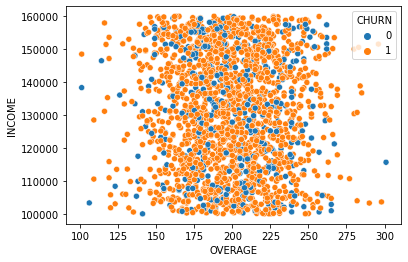

In [92]:
sns.scatterplot(x=ovg,y=inc,hue=Target,data=temp)

In [93]:
temp[Target].mean()

0.809666168410563

<AxesSubplot:xlabel='AVERAGE_CALL_DURATION', ylabel='Count'>

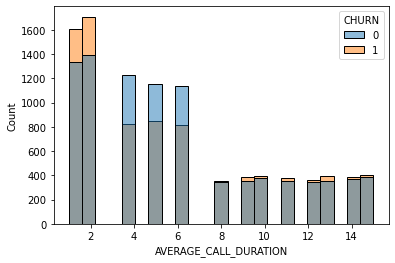

In [94]:
sns.histplot(x=avg,hue=Target,data=mobile)

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

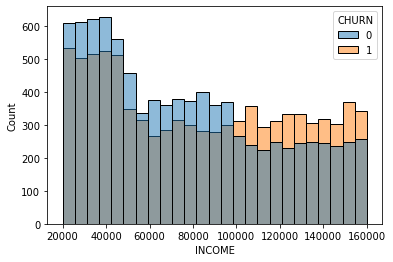

In [95]:
sns.histplot(x=inc,hue=Target,data=mobile)

In [96]:
temp1 = mobile.loc[(mobile[ovg]>=150)&(mobile[price]>=400)]

<AxesSubplot:xlabel='OVERAGE', ylabel='HANDSET_PRICE'>

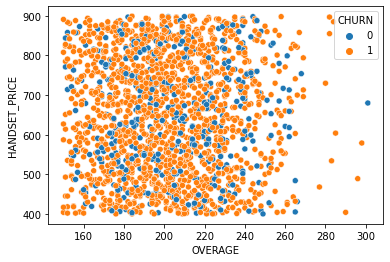

In [97]:
sns.scatterplot(x=ovg,y=price, hue=Target, data=temp1)

<AxesSubplot:xlabel='OVERAGE', ylabel='HANDSET_PRICE'>

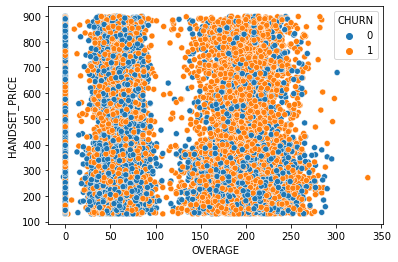

In [98]:
sns.scatterplot(x=ovg,y=price,hue=Target,data=mobile)

In [99]:
temp1[Target].mean()

0.7904316172646906

초과 사용시간 150분 이상 & 휴대폰 가격 400달러 이상의 경우 이동할 가능성이 크다.

<AxesSubplot:xlabel='HOUSE', ylabel='HANDSET_PRICE'>

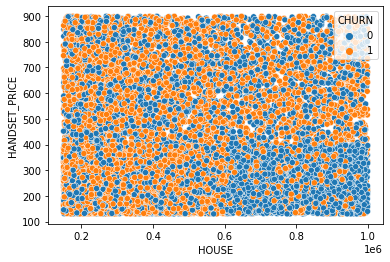

In [100]:
sns.scatterplot(x='HOUSE',y=price, hue=Target, data=mobile)

In [101]:
tmp1 = mobile.loc[(mobile['HOUSE']>=500000)&(mobile[price]>=400)]
# 1시방향

tmp2 = mobile.loc[(mobile['HOUSE']>=500000)&(mobile[price]<400)]
# 5시방향

tmp3 = mobile.loc[(mobile['HOUSE']<500000)&(mobile[price]>=400)]
# 7시방향

tmp4 = mobile.loc[(mobile['HOUSE']<500000)&(mobile[price]<400)]
# 11시방향

<AxesSubplot:xlabel='HOUSE', ylabel='HANDSET_PRICE'>

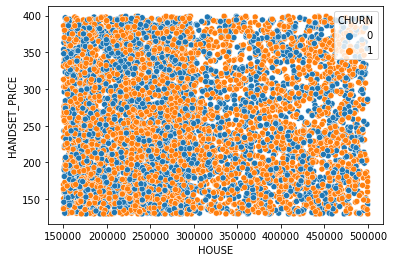

In [102]:
sns.scatterplot(x='HOUSE',y=price,hue=Target,data=tmp4)

In [103]:
tmp1[Target].mean()

0.5444652908067542

In [104]:
tmp2[Target].mean()

0.30502369668246443

In [105]:
tmp3[Target].mean()

0.5800827423167849

In [106]:
tmp4[Target].mean()

0.5800959603776505

In [107]:
mobile['HOUSE'].mean()

492950.5326960922